In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from scipy import misc
from scipy.ndimage import zoom
from tqdm import tqdm_notebook
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.layers.convolutional import Conv2D
from keras.preprocessing.image import ImageDataGenerator
from tqdm import tqdm_notebook




%matplotlib inline

Using TensorFlow backend.


In [2]:
img_rows, img_cols = 100, 100
input_shape = (50, 50, 1)
target_dict = {
    'one': 0,
    'two': 1,
    'three': 2,
    'four': 3,
    'five': 4,
    'six': 5,
    'seven': 6,
    'eight': 7
}

In [3]:
df = pd.read_csv('img_data.csv', index_col=0)

In [4]:
target = df['target'].map(target_dict).values
data = df.loc[:, df.columns != 'target'].values.reshape((-1, img_rows, img_cols))

In [5]:
new_img = []
for i in data:
    new_img.append(misc.imresize(i, (50, 50)))
data = np.array(new_img)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size = 0.25, random_state=9)

In [7]:
X_train = X_train.reshape(-1, 50, 50, 1)
X_test = X_test.reshape(-1, 50, 50, 1)

In [8]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [9]:
Y_train = np_utils.to_categorical(y_train, 8)
Y_test = np_utils.to_categorical(y_test, 8)

In [10]:
train_datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2)


test_datagen = ImageDataGenerator(        
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2)

In [11]:
train_datagen.fit(X_train.reshape(-1, 50, 50, 1))
test_datagen.fit(X_test.reshape(-1, 50, 50, 1))

In [15]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(50, 50, 1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(8))
model.add(Activation('sigmoid'))

In [16]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [17]:
a = next(test_datagen.flow(X_test, Y_test, batch_size=32))

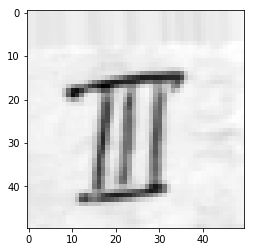

In [18]:
plt.imshow(a[0][23].reshape(50, 50), cmap='gray')

In [19]:
history = model.fit_generator(
    train_datagen.flow(X_train, Y_train, batch_size=32),
    steps_per_epoch=400*0.75 // 32,
    epochs=500,
    validation_data=test_datagen.flow(X_test, Y_test, batch_size=32),
    validation_steps=400*0.25 // 32)

Epoch 1/500
9/9 [==============================] - 15s 2s/step - loss: 2.1104 - acc: 0.0979 - val_loss: 2.0875 - val_acc: 0.1042
Epoch 2/500
9/9 [==============================] - 5s 519ms/step - loss: 2.0813 - acc: 0.1433 - val_loss: 2.1026 - val_acc: 0.1042
Epoch 3/500
9/9 [==============================] - 5s 527ms/step - loss: 2.0899 - acc: 0.1364 - val_loss: 2.0842 - val_acc: 0.0938
Epoch 4/500
9/9 [==============================] - 5s 529ms/step - loss: 2.0808 - acc: 0.1354 - val_loss: 2.0825 - val_acc: 0.1250
Epoch 5/500
9/9 [==============================] - 5s 501ms/step - loss: 2.0819 - acc: 0.1337 - val_loss: 2.0804 - val_acc: 0.1042
Epoch 6/500
9/9 [==============================] - 5s 553ms/step - loss: 2.0848 - acc: 0.1215 - val_loss: 2.0845 - val_acc: 0.0938
Epoch 7/500
9/9 [==============================] - 5s 580ms/step - loss: 2.0835 - acc: 0.1285 - val_loss: 2.0848 - val_acc: 0.0938
Epoch 8/500
9/9 [==============================] - 6s 633ms/step - loss: 2.0792 - acc

9/9 [==============================] - 4s 500ms/step - loss: 1.0112 - acc: 0.6224 - val_loss: 0.8777 - val_acc: 0.7708
Epoch 64/500
9/9 [==============================] - 4s 472ms/step - loss: 0.9770 - acc: 0.6424 - val_loss: 0.8830 - val_acc: 0.6562
Epoch 65/500
9/9 [==============================] - 4s 495ms/step - loss: 1.0106 - acc: 0.6381 - val_loss: 0.8292 - val_acc: 0.7083
Epoch 66/500
9/9 [==============================] - 4s 485ms/step - loss: 1.0078 - acc: 0.5828 - val_loss: 0.9905 - val_acc: 0.6250
Epoch 67/500
9/9 [==============================] - 5s 600ms/step - loss: 0.9617 - acc: 0.5868 - val_loss: 0.8212 - val_acc: 0.6354
Epoch 68/500
9/9 [==============================] - 4s 484ms/step - loss: 0.9378 - acc: 0.6189 - val_loss: 0.8667 - val_acc: 0.6979
Epoch 69/500
9/9 [==============================] - 5s 501ms/step - loss: 0.9379 - acc: 0.6573 - val_loss: 0.8552 - val_acc: 0.7188
Epoch 70/500
9/9 [==============================] - 5s 526ms/step - loss: 1.0005 - acc: 0

Epoch 125/500
9/9 [==============================] - 4s 482ms/step - loss: 0.5670 - acc: 0.7959 - val_loss: 0.4949 - val_acc: 0.8542
Epoch 126/500
9/9 [==============================] - 5s 533ms/step - loss: 0.6034 - acc: 0.7604 - val_loss: 0.6151 - val_acc: 0.7812
Epoch 127/500
9/9 [==============================] - 4s 491ms/step - loss: 0.7280 - acc: 0.7010 - val_loss: 0.4819 - val_acc: 0.8542
Epoch 128/500
9/9 [==============================] - 4s 482ms/step - loss: 0.7177 - acc: 0.7307 - val_loss: 0.5912 - val_acc: 0.8125
Epoch 129/500
9/9 [==============================] - 4s 487ms/step - loss: 0.5625 - acc: 0.7780 - val_loss: 0.3919 - val_acc: 0.8958
Epoch 130/500
9/9 [==============================] - 5s 507ms/step - loss: 0.6177 - acc: 0.7728 - val_loss: 0.4720 - val_acc: 0.8125
Epoch 131/500
9/9 [==============================] - 4s 465ms/step - loss: 0.5459 - acc: 0.8199 - val_loss: 0.3986 - val_acc: 0.8750
Epoch 132/500
9/9 [==============================] - 4s 497ms/step - 

9/9 [==============================] - 4s 459ms/step - loss: 0.3678 - acc: 0.8574 - val_loss: 0.2704 - val_acc: 0.9167
Epoch 187/500
9/9 [==============================] - 6s 672ms/step - loss: 0.3977 - acc: 0.8611 - val_loss: 0.3336 - val_acc: 0.8958
Epoch 188/500
9/9 [==============================] - 5s 534ms/step - loss: 0.4292 - acc: 0.8269 - val_loss: 0.2953 - val_acc: 0.9167
Epoch 189/500
9/9 [==============================] - 4s 476ms/step - loss: 0.3987 - acc: 0.8414 - val_loss: 0.2663 - val_acc: 0.9479
Epoch 190/500
9/9 [==============================] - 5s 542ms/step - loss: 0.4009 - acc: 0.8472 - val_loss: 0.2917 - val_acc: 0.8958
Epoch 191/500
9/9 [==============================] - 4s 482ms/step - loss: 0.4127 - acc: 0.8497 - val_loss: 0.3205 - val_acc: 0.8854
Epoch 192/500
9/9 [==============================] - 5s 501ms/step - loss: 0.3815 - acc: 0.8584 - val_loss: 0.3119 - val_acc: 0.8958
Epoch 193/500
9/9 [==============================] - 4s 499ms/step - loss: 0.4061 -

Epoch 248/500
9/9 [==============================] - 6s 647ms/step - loss: 0.3275 - acc: 0.8794 - val_loss: 0.2440 - val_acc: 0.8958
Epoch 249/500
9/9 [==============================] - 5s 512ms/step - loss: 0.3358 - acc: 0.8706 - val_loss: 0.3650 - val_acc: 0.8646
Epoch 250/500
9/9 [==============================] - 4s 486ms/step - loss: 0.3366 - acc: 0.8795 - val_loss: 0.1571 - val_acc: 0.9479
Epoch 251/500
9/9 [==============================] - 6s 685ms/step - loss: 0.3345 - acc: 0.8951 - val_loss: 0.2193 - val_acc: 0.9271
Epoch 252/500
9/9 [==============================] - 7s 800ms/step - loss: 0.2738 - acc: 0.8993 - val_loss: 0.1609 - val_acc: 0.9583
Epoch 253/500
9/9 [==============================] - 5s 522ms/step - loss: 0.2921 - acc: 0.8863 - val_loss: 0.2339 - val_acc: 0.8854
Epoch 254/500
9/9 [==============================] - 5s 609ms/step - loss: 0.3471 - acc: 0.8679 - val_loss: 0.2241 - val_acc: 0.9375
Epoch 255/500
9/9 [==============================] - 5s 589ms/step - 

9/9 [==============================] - 5s 523ms/step - loss: 0.2509 - acc: 0.9108 - val_loss: 0.1780 - val_acc: 0.9167
Epoch 310/500
9/9 [==============================] - 4s 498ms/step - loss: 0.2384 - acc: 0.9143 - val_loss: 0.2162 - val_acc: 0.9479
Epoch 311/500
9/9 [==============================] - 6s 627ms/step - loss: 0.2551 - acc: 0.9057 - val_loss: 0.1911 - val_acc: 0.9271
Epoch 312/500
9/9 [==============================] - 5s 548ms/step - loss: 0.3059 - acc: 0.9038 - val_loss: 0.1517 - val_acc: 0.9583
Epoch 313/500
9/9 [==============================] - 6s 692ms/step - loss: 0.2213 - acc: 0.9178 - val_loss: 0.1607 - val_acc: 0.9479
Epoch 314/500
9/9 [==============================] - 7s 742ms/step - loss: 0.2637 - acc: 0.9038 - val_loss: 0.1368 - val_acc: 0.9583
Epoch 315/500
9/9 [==============================] - 6s 704ms/step - loss: 0.2353 - acc: 0.9335 - val_loss: 0.1654 - val_acc: 0.9375
Epoch 316/500
9/9 [==============================] - 6s 626ms/step - loss: 0.1741 -

Epoch 371/500
9/9 [==============================] - 4s 479ms/step - loss: 0.1264 - acc: 0.9720 - val_loss: 0.1520 - val_acc: 0.9479
Epoch 372/500
9/9 [==============================] - 5s 523ms/step - loss: 0.1782 - acc: 0.9318 - val_loss: 0.0956 - val_acc: 0.9688
Epoch 373/500
9/9 [==============================] - 4s 493ms/step - loss: 0.1758 - acc: 0.9370 - val_loss: 0.1431 - val_acc: 0.9583
Epoch 374/500
9/9 [==============================] - 5s 520ms/step - loss: 0.1602 - acc: 0.9475 - val_loss: 0.1169 - val_acc: 0.9479
Epoch 375/500
9/9 [==============================] - 4s 485ms/step - loss: 0.2579 - acc: 0.9132 - val_loss: 0.2244 - val_acc: 0.9167
Epoch 376/500
9/9 [==============================] - 5s 555ms/step - loss: 0.2793 - acc: 0.9021 - val_loss: 0.0967 - val_acc: 0.9583
Epoch 377/500
9/9 [==============================] - 4s 491ms/step - loss: 0.1745 - acc: 0.9318 - val_loss: 0.1737 - val_acc: 0.9271
Epoch 378/500
9/9 [==============================] - 4s 498ms/step - 

9/9 [==============================] - 4s 476ms/step - loss: 0.2261 - acc: 0.9225 - val_loss: 0.1519 - val_acc: 0.9271
Epoch 433/500
9/9 [==============================] - 4s 496ms/step - loss: 0.2177 - acc: 0.9306 - val_loss: 0.0859 - val_acc: 0.9688
Epoch 434/500
9/9 [==============================] - 4s 479ms/step - loss: 0.1838 - acc: 0.9155 - val_loss: 0.0895 - val_acc: 0.9792
Epoch 435/500
9/9 [==============================] - 5s 507ms/step - loss: 0.1492 - acc: 0.9410 - val_loss: 0.1116 - val_acc: 0.9583
Epoch 436/500
9/9 [==============================] - 4s 489ms/step - loss: 0.1310 - acc: 0.9510 - val_loss: 0.1226 - val_acc: 0.9479
Epoch 437/500
9/9 [==============================] - 5s 511ms/step - loss: 0.2122 - acc: 0.9143 - val_loss: 0.0947 - val_acc: 0.9479
Epoch 438/500
9/9 [==============================] - 4s 483ms/step - loss: 0.2483 - acc: 0.8811 - val_loss: 0.1164 - val_acc: 0.9688
Epoch 439/500
9/9 [==============================] - 4s 480ms/step - loss: 0.1393 -

Epoch 494/500
9/9 [==============================] - 4s 484ms/step - loss: 0.2532 - acc: 0.9014 - val_loss: 0.1947 - val_acc: 0.9271
Epoch 495/500
9/9 [==============================] - 4s 487ms/step - loss: 0.2586 - acc: 0.9143 - val_loss: 0.1311 - val_acc: 0.9271
Epoch 496/500
9/9 [==============================] - 5s 511ms/step - loss: 0.2206 - acc: 0.9167 - val_loss: 0.1211 - val_acc: 0.9583
Epoch 497/500
9/9 [==============================] - 4s 487ms/step - loss: 0.1604 - acc: 0.9423 - val_loss: 0.1189 - val_acc: 0.9583
Epoch 498/500
9/9 [==============================] - 4s 490ms/step - loss: 0.1667 - acc: 0.9388 - val_loss: 0.0914 - val_acc: 0.9583
Epoch 499/500
9/9 [==============================] - 4s 490ms/step - loss: 0.1176 - acc: 0.9580 - val_loss: 0.1028 - val_acc: 0.9688
Epoch 500/500
9/9 [==============================] - 4s 474ms/step - loss: 0.1407 - acc: 0.9405 - val_loss: 0.0943 - val_acc: 0.9583


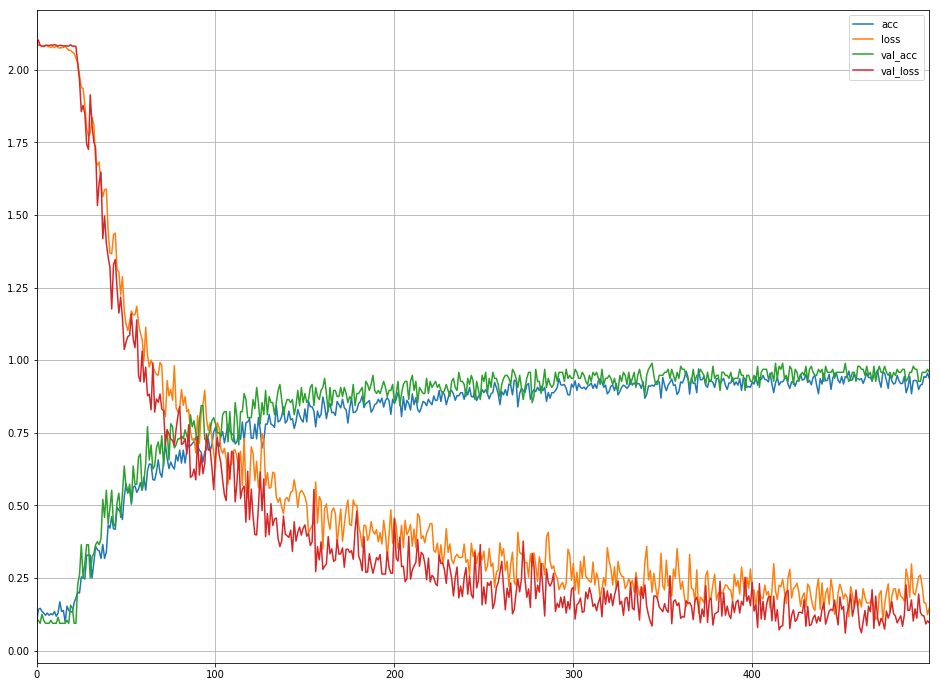

In [20]:
pd.DataFrame(history.history).plot(grid=True, figsize=(16, 12));

In [21]:
import os
duration = 1  # second
freq = 440  # Hz
os.system('play --no-show-progress --null --channels 1 synth %s sine %f' % (duration, freq))

0

In [ ]:
!git add classification_of_roman_numbers.ipynb
!git commit -m "a"